<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Emotion-Detection-Project---by-Isfandyar-Virani" data-toc-modified-id="Emotion-Detection-Project---by-Isfandyar-Virani-1">Emotion Detection Project - by Isfandyar Virani</a></span></li><li><span><a href="#Importing-data-and-Cleaning" data-toc-modified-id="Importing-data-and-Cleaning-2">Importing data and Cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3">EDA</a></span></li><li><span><a href="#Additional-Text-Cleaning" data-toc-modified-id="Additional-Text-Cleaning-4">Additional Text Cleaning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Scaling-data" data-toc-modified-id="Scaling-data-4.0.0.1">Scaling data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Building-models-&amp;-evaluating" data-toc-modified-id="Building-models-&amp;-evaluating-5">Building models &amp; evaluating</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5.0.0.1">Model Evaluation</a></span></li><li><span><a href="#Prediction-time" data-toc-modified-id="Prediction-time-5.0.0.2">Prediction time</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Emotion Detection Project - by Isfandyar Virani

__August 2021__

First we import all libraries required for this project

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from sklearn.linear_model import LogisticRegression

%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

import pickle

# Importing data and Cleaning

We have data from 5 corpora, let us go 1 by 1 and start importing and cleaning them

For this project we only want Ekman’s six core emotions: happy, sad, anger, fear, surprise, and disgust.

<img src="https://www.verywellmind.com/thmb/t-mUuo1_CGJePM4okOgdHsx1No8=/1333x1000/smart/filters:no_upscale()/an-overview-of-the-types-of-emotions-4163976-01-474bb455cfe74c3cb98ea46113e3108b.png" >

__Corpus 1__ - __Emotion Stimulus__  - http://www.site.uottawa.ca/∼diana/resources/emotion_stimulus_data

In [236]:
dataset1_cause = pd.read_csv('Dataset/Emotion Cause.txt', delimiter = "\t", header=None)

In [237]:
dataset1_nocause  = pd.read_csv('Dataset/No Cause.txt',  delimiter = "\t", header=None)

In [238]:
# Inspecting data
dataset1_cause.head()

,0
0,<happy>I suppose I am happy <cause>being so ` ...
1,<happy>Lennox has always truly wanted to fight...
2,"<happy>He was a professional musician now , st..."
3,<happy>Holmes is happy <cause>having the freed...
4,<happy>I had problems with tutors trying to en...


In [239]:
# Inspecting data
dataset1_nocause.head()

,0
0,<happy>This did the trick : the boys now have ...
1,"<happy>When Anna left Inspector Aziz , she was..."
2,"<happy>And though , as Lachlan had planned , t..."
3,"<happy>Honestly , I 'm really happy for you ! ..."
4,<happy>Lesley was totally happy about it . <\h...


In [240]:
dataset1_cause.shape

(820, 1)

In [241]:
dataset1_nocause.shape

(1594, 1)

__Initial inspection__:
+ 820 + 1594 rows of text
+ Emotion needs to be extracted, as its labeled in `<emotion>` before and after the text sentence
+ No cause data has `<emotion>` before and after while Cause data have `<cause>` somewhere in the middle of the sentence

Time to use `str.split()` to split data into 2 columns: _emotions_ and _text_.

In [242]:
dataset1_nocause = dataset1_nocause[0].str.split('>',  n = 1,expand=True) # Spliting on >

In [243]:
dataset1_cause = dataset1_cause[0].str.split('>',  n = 1,expand=True) # Splitting on >

In [244]:
dataset1_cause.head()

,0,1
0,<happy,I suppose I am happy <cause>being so ` tiny'<\...
1,<happy,Lennox has always truly wanted to fight for th...
2,<happy,"He was a professional musician now , still sen..."
3,<happy,Holmes is happy <cause>having the freedom of t...
4,<happy,I had problems with tutors trying to encourage...


In [245]:
dataset1_cause[0] = dataset1_cause[0].str[1:] # Removing < (first letter) from the first column

In [246]:
dataset1_nocause[0] = dataset1_nocause[0].str[1:] # Removing < (first letter) from the first column

In [247]:
dataset1_nocause.head() #Check

,0,1
0,happy,This did the trick : the boys now have a more ...
1,happy,"When Anna left Inspector Aziz , she was much h..."
2,happy,"And though , as Lachlan had planned , they had..."
3,happy,"Honestly , I 'm really happy for you ! <\happy>"
4,happy,Lesley was totally happy about it . <\happy>


In [248]:
dataset1_nocause[1] = dataset1_nocause[1].str.split('<' , expand = True)[0] #Spliting on '<' on text column and only keeping the text column 

In [249]:
dataset1_nocause # Check

,0,1
0,happy,This did the trick : the boys now have a more ...
1,happy,"When Anna left Inspector Aziz , she was much h..."
2,happy,"And though , as Lachlan had planned , they had..."
3,happy,"Honestly , I 'm really happy for you !"
4,happy,Lesley was totally happy about it .
...,...,...
1589,shame,He gets real humiliated and has to leave .
1590,shame,They aimed for higher status jobs and felt hum...
1591,shame,He cursed his lack of self-control ; he knew t...
1592,shame,Sometimes I've thought I 'll never forget wha...


Now let us deal with dataset with causes labeled by `<cause>` in the middle of the sentence

In [250]:
# Removing <cause> labels from the sentences
dataset1_cause[1] = dataset1_cause[1].str.replace("<cause>" , "").str.replace("<\\\\cause>" , "").str.split('<' , expand = True)[0]

In [251]:
dataset1_cause[1].head(10)

0    I suppose I am happy being so ` tiny' ; it mea...
1    Lennox has always truly wanted to fight for th...
2    He was a professional musician now , still sen...
3    Holmes is happy having the freedom of the hous...
4    I had problems with tutors trying to encourage...
5    These days he is quite happy travelling by tro...
6              I 'm really happy in the group now . " 
7    I was given a dummy in which to do my prelimin...
8    I must say I was not totally happy about her g...
9    Indeed , the two M boys themselves were not to...
Name: 1, dtype: object

Now we will join both datasets together and make 1 dataset

In [252]:
dataset1 = dataset1_cause.append(dataset1_nocause)

In [253]:
dataset1.sample(15) #Checking

,0,1
794,surprise,""" No , "" I said , trying to sound convincing b..."
636,sad,Five minutes went by as she reflected that Ros...
1021,anger,Lady followed her example rather than suffer a...
30,happy,` Estelle 's delight in Thomas made your mothe...
949,disgust,Now fed-up locals want the name of their quiet...
234,sad,"He turned away , his feeling of anguish at the..."
1204,anger,"He was exasperated , but not cast down ."
489,anger,"` Jane , my darling , it 's not because she 's..."
372,sad,On this occasion City accepted with relish the...
1192,anger,"If I failed to do so , he would become exasper..."


The columns are labelled `0` and `1` for the columns. We will replace them with `emotion` and `text` labels.

In [254]:
dataset1.columns = ['emotion', 'text'] #Renaming labels

In [255]:
dataset1.head() # Checking

,emotion,text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...


In [256]:
dataset1.shape

(2414, 2)

The new dataset has 2414 rows of data with `emotion` and `text` columns

In [257]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 0 to 1593
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  2414 non-null   object
 1   text     2414 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


Based on `info()` command, we see there is no null values as it is saying 2414 non-null count

Let us examine how the data is distributed

In [258]:
dataset1['emotion'].value_counts()

sad         575
anger       483
happy       479
fear        423
surprise    213
shame       146
disgust      95
Name: emotion, dtype: int64

Since we only want 6 core emotions, we will be removing data labelled `shame`

In [259]:
shamerows = dataset1.loc[dataset1['emotion'] == 'shame'].index #Selection shame emotion

In [260]:
df1 = dataset1.drop(shamerows, axis=0) #Dropping shame emotion

In [261]:
df1.shape #shape of data without shame emotion

(2200, 2)

In [262]:
df1['emotion'].value_counts() #Checking emotion distribution without shame emotion

sad         575
anger       483
happy       479
fear        423
surprise    145
disgust      95
Name: emotion, dtype: int64

__Corpus 2__ - __DailyDialog__  - https://aclanthology.org/I17-1099/

In [263]:
dataset2_text = pd.read_csv('EMNLP_dataset/dialogues_text.txt', delimiter = "\t", header=None)

In [264]:
dataset2_text.head() #Check

,0
0,The kitchen stinks . __eou__ I'll throw out th...
1,"So Dick , how about getting some coffee for to..."
2,Are things still going badly with your housegu...
3,Would you mind waiting a while ? __eou__ Well ...
4,Are you going to the annual party ? I can give...


In [265]:
dataset2_emo = pd.read_csv('EMNLP_dataset/dialogues_emotion.txt', delimiter = "\t", header=None)

In [266]:
dataset2_emo.head() #Check

,0
0,2 0
1,4 2 0 1 0
2,0 1 0 0
3,0 0 0 4
4,0 4 4


__Initial inspection__:
+ Sentences dataset has rows with multiple sentences
+ Emotion data has rows with multiple emotion
+ Emotion is labeled by `__eou__` in text data

Let us start by spliting sentences on `__eou__` by using `str.split()` command.

In [267]:
dataset2_text[0].str.split('__eou__' , expand = True)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,The kitchen stinks .,I'll throw out the garbage .,,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"So Dick , how about getting some coffee for to...",Coffee ? I don ’ t honestly like that kind of...,"Come on , you can at least try a little , bes...",What ’ s wrong with that ? Cigarette is the t...,"Not for me , Dick .",,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Are things still going badly with your housegu...,Getting worse . Now he ’ s eating me out of h...,"Leo , I really think you ’ re beating around ...",You ’ re right . Everything is probably going...,,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Would you mind waiting a while ?,"Well , how long will it be ?",I'm not sure . But I'll get a table ready as ...,OK . We'll wait .,,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Are you going to the annual party ? I can give...,Thanks a lot . That's the favor I was going t...,The pleasure is mine .,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13113,You have done an excellent job this year and w...,I am glad that you have been happy with my pe...,"As a result of your performance , we are happ...",Does this title come with an increase in sala...,"Yes , it does .",Can you give me the specifics ?,Your monthly gross salary will increase by $ ...,That sounds fair .,,None,...,None,None,None,None,None,None,None,None,None,None
13114,Lindsay Tipping gave me your name as a referen...,"Lindsay , of course , I will be more than hap...",How long was she employed with your company ?,She freelanced with us for 3 years . She was ...,"Freelance , hmm . How do you think she will m...",She ’ s a consummate professional and a team-...,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13115,The consignments of chemical instruments have ...,Is there anything wrong ?,"We bought 1,000 sets of chemical instruments ...",It's hard for us to believe it . Our instrume...,Here is the survey report from a well-known p...,"Well . According to the contract , we are res...",Forty faulty instruments means that 4 % are n...,"I am sorry about the quality problem , but I ...",All right . In that case we are still willing...,,...,None,None,None,None,None,None,None,None,None,None
13116,good morning . How can I help you ?,I'd like to open a new account .,have you filled out an application form ?,yes . And I've brought some documents along w...,yes . I'll just have my assistant look over t...,yes . Does the checking account come with a d...,"yes . Actually , both accounts come with card...",that's very convenient .,it is . Our customers really like it . Do you...,yes . What's the maximum amount that you are ...,...,None,None,None,None,None,None,None,None,None,None


We see that the text data is in 13118 rows with upto 36 columns, many of the columns empty on the right side

Let us do the same for emotion dataset by splting instead on empty space

In [268]:
dataset2_emo[0].str.split(' ' , expand = True)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,2,0,,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,4,2,0,1,0,,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,0,1,0,0,,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0,0,0,4,,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,0,4,4,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13113,0,4,0,0,0,0,0,4,,None,...,None,None,None,None,None,None,None,None,None,None
13114,0,4,0,0,0,0,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13115,0,0,0,6,0,0,0,0,0,,...,None,None,None,None,None,None,None,None,None,None
13116,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


We see that the emotion data is in 13118 rows as well with upto 36 columns, many of the columns empty on the right side

We need to convert these two datasets into a single columns and discart all the empty values

In [269]:
pd.melt(dataset2_text[0].str.split('__eou__' , expand = True))['value'].dropna() #Converting data into single column and dropping NA values

0                                     The kitchen stinks . 
1         So Dick , how about getting some coffee for to...
2         Are things still going badly with your housegu...
3                         Would you mind waiting a while ? 
4         Are you going to the annual party ? I can give...
                                ...                        
429202                                                     
430843                                                     
435997     I'm Alice . I guess I'll have to be your moth...
449115                             Thanks , Mom . Thanks . 
462233                                                     
Name: value, Length: 116098, dtype: object

In [270]:
pd.melt(dataset2_emo[0].str.split(' ' , expand = True))['value'].dropna() #Converting data into single column and dropping NA values

0         2
1         4
2         0
3         0
4         0
         ..
429202     
430843     
435997    0
449115    4
462233     
Name: value, Length: 116097, dtype: object

This seems like a good choice of data, let us save these into `d1` and `d2`

In [271]:
d1 = pd.melt(dataset2_text[0].str.split('__eou__' , expand = True)) 

In [272]:
d2 = pd.melt(dataset2_emo[0].str.split(' ' , expand = True))

In [273]:
d1['value'] #Check

0                                     The kitchen stinks . 
1         So Dick , how about getting some coffee for to...
2         Are things still going badly with your housegu...
3                         Would you mind waiting a while ? 
4         Are you going to the annual party ? I can give...
                                ...                        
472243                                                 None
472244                                                 None
472245                                                 None
472246                                                 None
472247                                                 None
Name: value, Length: 472248, dtype: object

Let us join `d1` and `d2` and name the columns `emotion` and `text`

In [274]:
d = pd.DataFrame({"emotion": d2['value'], "text" : d1['value']})

In [275]:
d['emotion'].value_counts() #checking for distribution

0    85572
     13118
4    12885
6     1823
5     1150
1     1022
2      353
3      174
Name: emotion, dtype: int64

We notice that the distribution is from 1-6 instead of words, so we need to map this. 
Further more, we need to remove empty values.

In [276]:
d.info() # checking info of the whole dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472248 entries, 0 to 472247
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emotion  116097 non-null  object
 1   text     116098 non-null  object
dtypes: object(2)
memory usage: 7.2+ MB


From `info()` command, it seems like something is wrong. Let us examine further

In [277]:
d.shape #Checking overall shape

(472248, 2)

Seems like there are quite alot null values based on `shape` and `info`

Let us first make a dictionary and map it, then remove `null` and `no emotion` data

In [278]:
dict = {
    '0': "no emotion", 
    '1': "anger",
    '2': "disgust",
    '3': "fear", 
    '4': "happy", 
    '5': "sad", 
    '6': "surprise"
}
# dictionary for emotions

In [279]:
d['emotion'] = d["emotion"].map(dict) # changing from 0-6 to emotions names by mapping the dictionary

In [280]:
d #checking

,emotion,text
0,disgust,The kitchen stinks .
1,happy,"So Dick , how about getting some coffee for to..."
2,no emotion,Are things still going badly with your housegu...
3,no emotion,Would you mind waiting a while ?
4,no emotion,Are you going to the annual party ? I can give...
...,...,...
472243,NaN,NaN
472244,NaN,NaN
472245,NaN,NaN
472246,NaN,NaN


We still have `NaN` and `no emotion` data. Let us remove them

In [281]:
noemotion_rows = d.loc[d['emotion'] == 'no emotion'].index #get index of all no emotion rows

In [282]:
d = d.drop(noemotion_rows, axis=0) #dropping the no emotion rows by index

In [283]:
d.isna().sum() #Checking NA values

emotion    369269
text       356150
dtype: int64

In [284]:
d = d.dropna() #dropping the NA values

In [285]:
d #checking dataset

,emotion,text
0,disgust,The kitchen stinks .
1,happy,"So Dick , how about getting some coffee for to..."
5,happy,Isn ’ t he the best instructor ? I think he ’ ...
53,sad,I'm sorry I'm late .
69,happy,"I passed all the tests , Mom ."
...,...,...
384216,happy,That ’ s right . I have a lot to learn from y...
392619,happy,Excellent . I would be happy to get started o...
397334,happy,You can ask me any question at any time .
422879,happy,Thanks . My name's Nick .


Now we have 17407 rows of data with 2 columns

In [286]:
d['emotion'].value_counts() #Checking for distribtion of data

happy       12885
surprise     1823
sad          1150
anger        1022
disgust       353
fear          174
Name: emotion, dtype: int64

Let us join our dataset `df1` and `d` datasets.

In [287]:
dataset = df1.append(d) #joining data using append command

Now Emotion Stimulus and DailyDialog datasets are joined

In [288]:
dataset #check

,emotion,text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...
...,...,...
384216,happy,That ’ s right . I have a lot to learn from y...
392619,happy,Excellent . I would be happy to get started o...
397334,happy,You can ask me any question at any time .
422879,happy,Thanks . My name's Nick .


__Corpus 3__ - __Emotions dataset for NLP (Kaggle)__  - https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp

This dataset comes in 3 files - train, test and val

Let us start by importing these and merging them

In [289]:
dataset3_text_train = pd.read_csv('Kaggle/train.txt', delimiter = "\t", header=None)

In [290]:
dataset3_text_test = pd.read_csv('Kaggle/test.txt', delimiter = "\t", header=None)

In [291]:
dataset3_text_val = pd.read_csv('Kaggle/val.txt', delimiter = "\t", header=None)

In [292]:
dataset3_text = dataset3_text_train.append([dataset3_text_test,dataset3_text_val]) #joining them by using command append

In [293]:
dataset3_text.head(10) #check

,0
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger
5,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...
9,i feel romantic too;love


In [294]:
dataset3_text.shape

(20000, 1)

__Initial inspection__:
+ The data has 20000 rows.
+ The emotion is in the same column. We need to use str.split() on `;` to make 2 columns

In [295]:
dataset3_text = dataset3_text[0].str.split(';',  n = 1,expand=True) #spliting on ;

In [296]:
dataset3_text[1].value_counts() #checking distribution of data

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: 1, dtype: int64

Since we have alot of happy emotion data from previous data sets, let us not include it in this dataset. This way we can deal with biases towards happy as the dataset will be unbalanced.
Let us make a new dict with sadness = sad to stay consistent with other datasets

In [297]:
# Creating a dictionary to map
# Not taking in 'happy' data
dict2 = {
    'love': "love", 
    'anger': "anger",
    'fear': "fear", 
    'sadness': "sad", 
    'surprise': "surprise"
}


In [298]:
dataset3_text[1] = dataset3_text[1].map(dict2) #mapping

In [299]:
dataset3_text[1].value_counts() #Checking

sad         5797
anger       2709
fear        2373
love        1641
surprise     719
Name: 1, dtype: int64

Time to remove emotion 'love' since its not our targeted emotion

In [300]:
noemotion_rows = dataset3_text.loc[dataset3_text[1] == 'love'].index #getting index of `Love` emotion

In [301]:
dataset3_text = dataset3_text.drop(noemotion_rows, axis=0) #droping love emotion

In [302]:
dataset3_text[1].value_counts() #checking distribution

sad         5511
anger       2574
fear        2252
surprise     685
Name: 1, dtype: int64

In [303]:
dataset3_text.isna().sum() #checking for NA values

0       0
1    6416
dtype: int64

In [304]:
dataset3_text.dropna() #dropping NA values

,0,1
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sad
6,ive been taking or milligrams or times recomme...,surprise
...,...,...
1989,im okay but feeling a little apprehensive as m...,fear
1992,i feel i should make is how surprised but ente...,surprise
1993,i feel so tortured by it,anger
1994,i feel a bit rude leaving you hanging there fr...,anger


In [305]:
dataset3_text.shape #checking shape

(17438, 2)

Let us rename the columns to `text` and `emotion`

In [306]:
dataset3_text.columns = ['text', 'emotion']

In [307]:
dataset3_text.head()

,text,emotion
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sad
6,ive been taking or milligrams or times recomme...,surprise


Let us join `dataset3` to the main `dataset`

In [308]:
dataset = dataset.append(dataset3_text) 

In [309]:
dataset #check

,emotion,text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...
...,...,...
1995,sad,im having ssa examination tomorrow in the morn...
1996,NaN,i constantly worry about their fight against n...
1997,NaN,i feel its important to share this info for th...
1998,NaN,i truly feel that if you are passionate enough...


__Corpus 4__ - __Emotion Detection from Text (Kaggle)__  - https://www.kaggle.com/pashupatigupta/emotion-detection-from-text

Import dataset

In [310]:
dataset4 =  pd.read_csv('Kaggle2/tweet_emotions.csv')

In [311]:
dataset4.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Let us drop the `tweet_id` column

In [312]:
dataset4 = dataset4.drop(columns=['tweet_id'])

In [313]:
dataset4.shape

(40000, 2)

In [314]:
dataset4.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [315]:
dataset4['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

The dataset has 40000 rows. But it has alot of emotions. Let us make dict to only get emotions that we are targeting.

In [316]:
# Excluding happy and sad data since we have alot of it from previous data to avoid bias
dict3 = {
    'anger': "anger",
    'surprise': 'surprise',
    'sadness': 'sad',
}

In [317]:
dataset4['sentiment'] = dataset4['sentiment'].map(dict3) #applying the dictionary

In [318]:
dataset4.isna().sum() #checking for NA values

sentiment    32538
content          0
dtype: int64

32538 rows out of 40000 are uselesss for us since we dont need those emotions.

In [319]:
dataset4 = dataset4.dropna()  #dropping NA vals

In [320]:
dataset4.shape

(7462, 2)

New dataset has only 7462 rows. Let us rename the columns

In [321]:
dataset4.columns = ['emotion', 'text']

In [322]:
dataset4['emotion'].value_counts() #checking for distribution

sad         5165
surprise    2187
anger        110
Name: emotion, dtype: int64

Let us join the `dataset4` with the main `dataset`

In [323]:
dataset = dataset.append(dataset4) #merging data

In [324]:
dataset.shape #new dataset size

(44507, 2)

In [325]:
dataset['emotion'].value_counts() #distribution of data in main dataset

happy       13364
sad         12401
surprise     4840
anger        4189
fear         2849
disgust       448
Name: emotion, dtype: int64

The data is still very skewed towards happy and sad emotion

__Corpus 5__ - __ISEAR Dataset (Kaggle)__  - https://www.kaggle.com/faisalsanto007/isear-dataset

In [326]:
dataset5 = pd.read_csv('ISEAR/eng_dataset.csv') #importing data

In [327]:
dataset5.head() #check

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [328]:
dataset5 = dataset5.drop(columns=['ID']) #dropping ID columns

In [329]:
dataset5.head() #check

,sentiment,content
0,anger,At the point today where if someone says somet...
1,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,anger,This game has pissed me off more than any othe...
3,anger,@spamvicious I've just found out it's Candice ...
4,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [330]:
dataset5['sentiment'].value_counts() #checking distribution

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [331]:
#maping new dict but not including joy and sadness
dict4 = {
    'fear': "fear", 
    'anger': "anger"
}

In [332]:
dataset5['sentiment'] = dataset5['sentiment'].map(dict4) #mapping dict

In [333]:
dataset5.columns = ['emotion', 'text'] #renaming columns

In [334]:
dataset5.isna().sum() #checking for NA values

emotion    3149
text          0
dtype: int64

In [335]:
dataset5 = dataset5.dropna()  #dropping all NA values

In [336]:
dataset = dataset.append(dataset5) #joining with main dataset

In [337]:
dataset.shape #checking the size of new dataset

(48460, 2)

Our main datset now has 48460 rows of data

In [338]:
dataset['emotion'].value_counts()

happy       13364
sad         12401
anger        5890
fear         5101
surprise     4840
disgust       448
Name: emotion, dtype: int64

The dataset is heavily skewed. We need to address this in future.

In [339]:
dataset.isna().sum() #checking for NA values

emotion    6416
text          0
dtype: int64

# EDA

In [341]:
dataset.shape

(42044, 2)

The dataset has 42044 rows

In [342]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42044 entries, 0 to 5492
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  42044 non-null  object
 1   text     42044 non-null  object
dtypes: object(2)
memory usage: 985.4+ KB


Let us make a distribution table

In [343]:
dataset['emotion'].value_counts()

happy       13364
sad         12401
anger        5890
fear         5101
surprise     4840
disgust       448
Name: emotion, dtype: int64

Let us visualize this distribution table

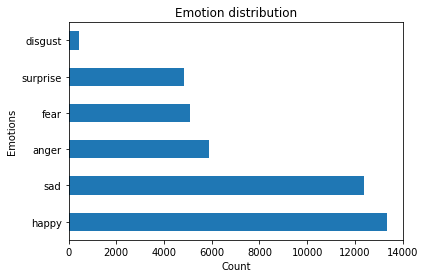

In [344]:
dataset['emotion'].value_counts().plot(kind = 'barh')
plt.title("Emotion distribution")
plt.xlabel("Count")
plt.ylabel("Emotions")
plt.show()

In [345]:
dataset.sample(20) #checking by taking random sample

,emotion,text
81164,happy,Sounds like you are really getting in shape !
41046,happy,Looks good .
70818,sad,"Yes , I'm serious . I'm really sorry about mi..."
135631,anger,"Oh , you men ! You're all the same ."
212990,anger,To hell with you . The accident was your faul...
11660,sad,I am tired.
147896,happy,Wow ! You're right ! This refrigerator is gre...
85744,happy,I'm most grateful .
11885,sad,i feel the sting of the words as a dull ache a...
7545,sad,i feel quite disappointed in myself for being ...


In [347]:
dataset = dataset.reset_index() #remove the index that is out of order

In [349]:
# Data types
dataset.dtypes

index       int64
emotion    object
text       object
dtype: object

In [350]:
dataset = dataset.drop(columns=['index']) #droping the new index column

In [351]:
dataset #checking

,emotion,text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...
...,...,...
42039,fear,Pull over #tonight and make your car #shake ðŸ...
42040,fear,@Melanie_Pierce @HunterHayes awe ain't he a sw...
42041,fear,@FraserKeegan just had a steak pie supper
42042,fear,@annalisewrobel_ awe thank you so much love ðŸ’•


In [352]:
# Check for null values

dataset.isnull().sum()

emotion    0
text       0
dtype: int64

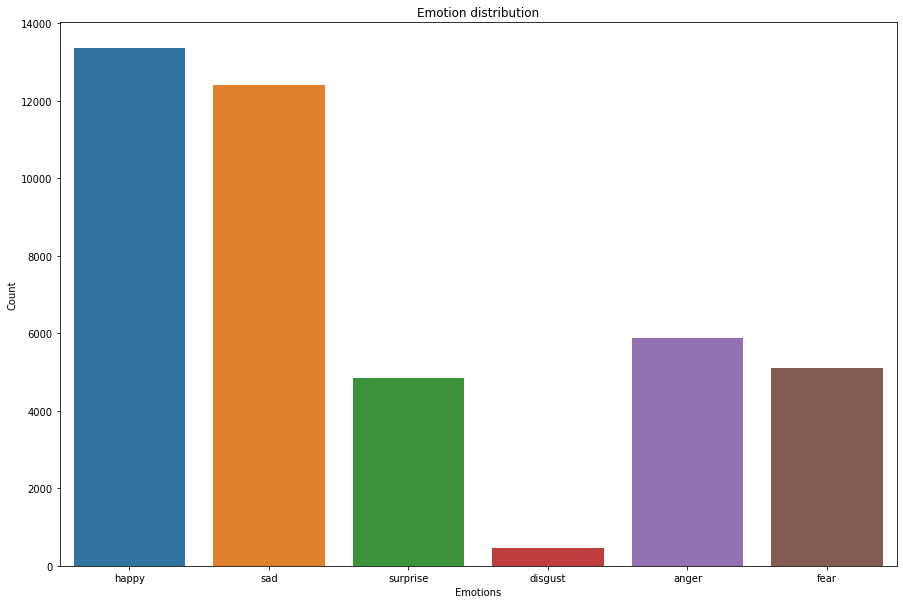

In [358]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'emotion', data=dataset)
plt.title("Emotion distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

Time to look at sentiments.

+ Postive - sen > 0
+ Neg - sen < 0
+ Neu - sen = 0

In [359]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result

In [360]:
dataset['Sentiment'] = dataset['text'].apply(get_sentiment) #getting sentiments

In [361]:
# Finding negative & neutral sentiment happy emotions
HappyNeg_Rows = dataset.loc[dataset['emotion'] == 'happy'].loc[dataset['Sentiment'] == 'Negative'].index
HappyNeu_Rows = dataset.loc[dataset['emotion'] == 'happy'].loc[dataset['Sentiment'] == 'Neutral'].index

In [362]:
dataset = dataset.drop(HappyNeg_Rows, axis=0) #dropping happy negative sentiments

In [363]:
dataset = dataset.drop(HappyNeu_Rows, axis=0) #dropping happy neutral sentiments

In [364]:
SadPos_Rows = dataset.loc[dataset['emotion'] == 'sad'].loc[dataset['Sentiment'] == 'Positive'].index
SadNeu_Rows = dataset.loc[dataset['emotion'] == 'sad'].loc[dataset['Sentiment'] == 'Neutral'].index

In [365]:
dataset = dataset.drop(SadPos_Rows, axis=0) #dropping sad postive sentiments

In [366]:
dataset = dataset.drop(SadNeu_Rows, axis=0) #dropping sad neutral sentiments

I removed these sentiments because I want least bias data for models

In [367]:
dataset['emotion'].value_counts() #checking distribution

happy       9178
anger       5890
sad         5399
fear        5101
surprise    4840
disgust      448
Name: emotion, dtype: int64

Compare Emotion vs Sentiment

In [368]:
dataset.groupby(['emotion', 'Sentiment']).size() #checking disribution by sentiments

emotion   Sentiment
anger     Negative     2416
          Neutral      1870
          Positive     1604
disgust   Negative      211
          Neutral       132
          Positive      105
fear      Negative     2022
          Neutral      1470
          Positive     1609
happy     Positive     9178
sad       Negative     5399
surprise  Negative     1017
          Neutral      1570
          Positive     2253
dtype: int64

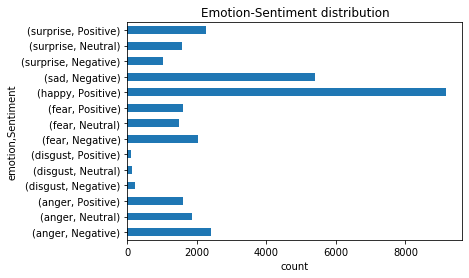

In [369]:
dataset.groupby(['emotion', 'Sentiment']).size().plot(kind='barh') #plotting sentiment graph
plt.title("Emotion-Sentiment distribution")
plt.xlabel("count")
plt.show()

C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


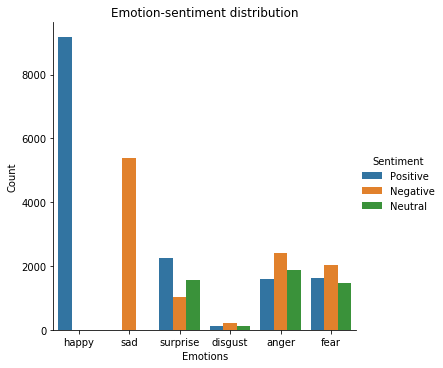

In [370]:
sns.factorplot(x= 'emotion', hue = 'Sentiment', kind = 'count', data = dataset)
plt.title("Emotion-sentiment distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

Since we dont want bias, and the dataset is way to skewed. Let us deal with it by just taking random sample of 4800 rows of dataset

In [371]:
#lets take only 4800 rows from each emotion (other than disgust as we dont have enough data)

dataset_happy = dataset.loc[dataset['emotion'] == 'happy'].sample(4800)
dataset_sad = dataset.loc[dataset['emotion'] == 'sad'].sample(4800)
dataset_surprise = dataset.loc[dataset['emotion'] == 'surprise'].sample(4800)
dataset_anger = dataset.loc[dataset['emotion'] == 'anger'].sample(4800)
dataset_fear = dataset.loc[dataset['emotion'] == 'fear'].sample(4800)
#dataset_neutral = dataset.loc[dataset['emotion'] == 'no emotion'].sample(4800)
dataset = dataset_happy.append([dataset_sad,
                                dataset_surprise,
                                dataset_anger,
                                dataset_fear
                                #,dataset_neutral
                               ])

In [372]:
dataset #checking

,emotion,text,Sentiment
4490,happy,Perfect . It really hits the spot .,Positive
164,happy,Even my father was n't too pleased about conti...,Positive
947,happy,"` I should think you 're pleased , are n't you...",Positive
7468,happy,This is a great botanical garden in the city .,Positive
18049,happy,"All right , then let's begin .",Positive
...,...,...,...
39168,fear,Danish pastries...oh know my nightmare! Old bo...,Positive
619,fear,"In reality , they may have been more anxious a...",Positive
39633,fear,@tcarrels \nSo when exactly did you lose your...,Positive
39308,fear,Throwback to when Khloe Kardashian was a host ...,Negative


We see that now we have 24000 rows

In [373]:
dataset['emotion'].value_counts() #checking distribution

sad         4800
anger       4800
fear        4800
surprise    4800
happy       4800
Name: emotion, dtype: int64

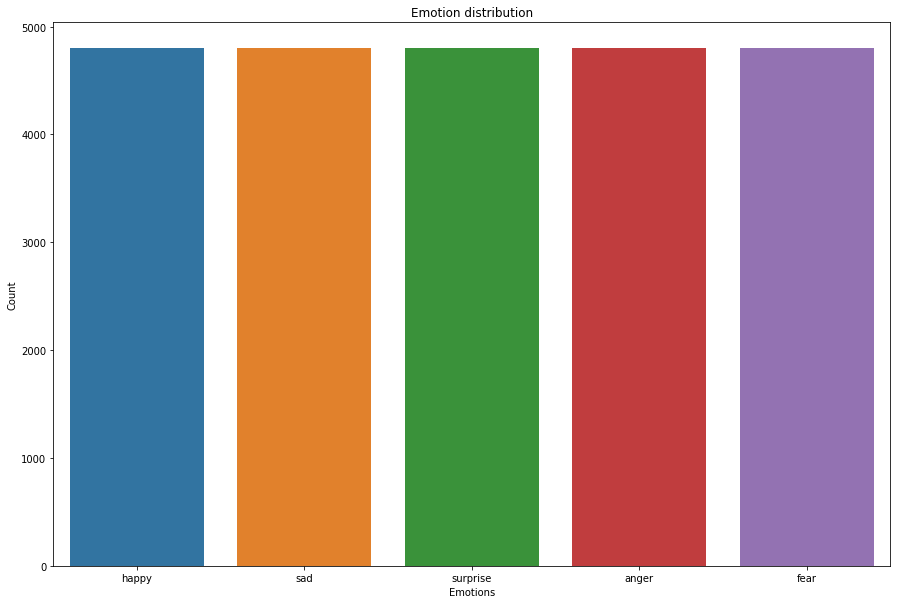

In [374]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'emotion', data=dataset)
plt.title("Emotion distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

Now we can do some extra cleaning in the data

# Additional Text Cleaning

In [142]:
dataset.sample(10)

,emotion,text,Sentiment
3345,happy,"Nice weather , honey !",Positive
23150,anger,i still feel jealous of my friends when their ...,Neutral
6300,anger,"Then , why didn't you try to prevent it in th...",Neutral
39937,fear,Are you worrying/worried?\n1Peter 5:7\nThrow a...,Positive
41075,fear,my husband lost Â£800 when he booked an apartm...,Neutral
38267,anger,JV girls earn the W vs Stonington 2-1 today. G...,Neutral
41212,fear,Accrington Stanley? Who are they? Exactly. Thi...,Positive
7361,happy,"great , let's go !",Positive
26898,anger,i actually feel insulted when the plot goes of...,Neutral
15682,surprise,"Really ? I like playing basketball , too .",Positive


Too many random symbols. We can deal with in in our tokenizer

In [143]:
dataset.shape

(24000, 3)

In [144]:
from nltk.tokenize import word_tokenize

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [146]:
import nltk

stemmer = nltk.stem.PorterStemmer()
# getting stemmer

Let us design our tokenizer

In [147]:
from nltk.corpus import stopwords 
import re
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    ## remove numbers
    #sentence = re.sub(r'\d+', '', sentence)    
    
    # remove punctuation and set to lower case
    #for punctuation_mark in string.punctuation:
     #   sentence = sentence.replace(punctuation_mark,'').lower()
    #sentence = tweet_tokenizer.tokenize(sentence)
    sentence = nltk.word_tokenize(sentence) 
    
    
    
    # split sentence into words
    #listofwords = sentence.split(' ')
    listofwords=[word.lower() for word in sentence if word.isalpha()]
    
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [148]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english') #getting stop words

Lets do a TF-IDF vectorizer on our data

In [149]:
tfidf = TfidfVectorizer(min_df=5,
                        max_df=0.95, # drop words that occur in at least 95% of the documents
                        tokenizer=my_tokenizer) 

In [150]:
data_transformed = tfidf.fit_transform(dataset["text"]) #saving our transformed data and fiting it

In [151]:
data_transformed.shape

(24000, 3554)

We get 3554 features

In [152]:
my_df = pd.DataFrame(columns=tfidf.get_feature_names(), data=data_transformed.toarray()) #converting to a pandas dataframe with feature names labeled

In [153]:
my_df.empty #checking emptyness in data

False

In [154]:
my_df #check

,abandon,abc,abil,abit,abl,absolut,absurd,abus,acc,accept,...,youv,yr,yuan,yummi,yup,zero,zombi,zone,â,ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
words = tfidf.get_feature_names() #getting the feature names


Let us plot the most frequest words in the dataset

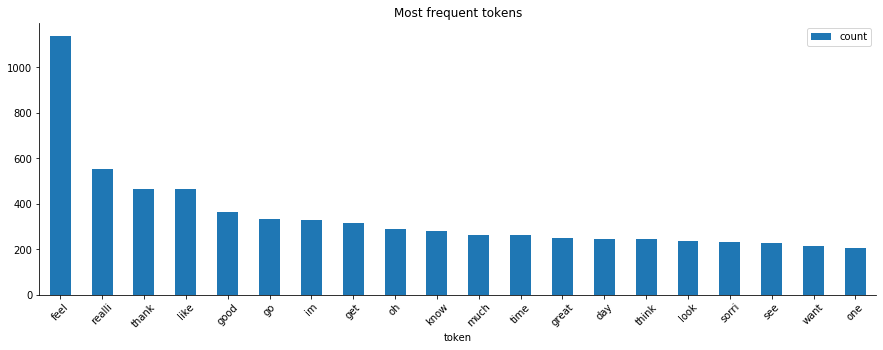

In [225]:
word_weights = my_df.sum(axis=0)


def plot_most_frequent(words, word_weights, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_weights})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    
plot_most_frequent(words, word_weights)

The weights for these top 20 words are:

In [157]:
word_weights.sort_values(ascending=False).head(20)

feel      1138.338455
realli     554.347395
thank      464.039577
like       462.948230
good       364.484835
go         331.744518
im         329.808545
get        315.124410
oh         287.914896
know       278.093043
much       262.288350
time       262.123757
great      250.525774
day        245.187464
think      243.198265
look       236.720154
sorri      233.374171
see        227.629883
want       214.147939
one        204.735383
dtype: float64

Time to setup X and y value for our data we we can split it to test and training sets

In [158]:
X = my_df
y = dataset['emotion']

In [159]:
X

,abandon,abc,abil,abit,abl,absolut,absurd,abus,acc,accept,...,youv,yr,yuan,yummi,yup,zero,zombi,zone,â,ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30) #splitting into test and training sets

#### Scaling data

Let us scale this data. This way we can get the most optimal model

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

First we will scale data then we will fit it in a vanila logistic regression model and check how accurate it is.

__MinMaxScaler__

In [162]:
minmax = MinMaxScaler()
minmax = minmax.fit(X_train)


X_train_minmax = minmax.transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [163]:
minmax_logit = LogisticRegression(n_jobs=-1)
minmax_logit.fit(X_train_minmax, y_train)
train_accuracy = minmax_logit.score(X_train_minmax, y_train)
print(f'Training accuracy: {train_accuracy}')
test_accuracy = minmax_logit.score(X_test_minmax, y_test)
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.8811904761904762
Test accuracy: 0.7591666666666667


__StandardScaler__

In [164]:
standard = StandardScaler()
standard = standard.fit(X_train)

X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [165]:
standard_logit = LogisticRegression(n_jobs=-1)
standard_logit.fit(X_train_standard, y_train)
train_accuracy = standard_logit.score(X_train_standard, y_train)
print(f'Training accuracy: {train_accuracy}')
test_accuracy = standard_logit.score(X_test_standard, y_test)
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.9658333333333333
Test accuracy: 0.6436111111111111


__RobustScaler__

In [166]:
robust = RobustScaler()
robust = robust.fit(X_train)


X_train_robust = robust.transform(X_train)
X_test_robust = robust.transform(X_test)

In [167]:
robust_logit = LogisticRegression(n_jobs=-1)
robust_logit.fit(X_train_robust, y_train)
train_accuracy = robust_logit.score(X_train_robust, y_train)
print(f'Training accuracy: {train_accuracy}')
test_accuracy = robust_logit.score(X_test_robust, y_test)
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.8563095238095239
Test accuracy: 0.7675


We have modelled with data transformed using the three different scalers. 

+ __MinMaxScaler__ - 75.92% test accuracy using vanilla logistic regression
+ __StandardScaler__ - 64.36% test accuracy using vanilla logistic regression
+ __RobustScaler__ - 76.75% test accuracy using vanilla logistic regression

We will be using __RobustScaler__ for our data for our models since it performed the best on our logistic regression tests


---

# Building models & evaluating

In [168]:
model_MultinomalNB = MultinomialNB() #initiate model
model_MultinomalNB.fit(X_train_robust, y_train) #fit model on training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [169]:
model_MultinomalNB.score(X_test_robust, y_test) #checking accuracy on test set

0.7220833333333333

---

#### Model Evaluation

In [177]:
yPred_model_MultinomalNB = model_MultinomalNB.predict(X_test_robust) #getting y_pred

In [178]:
print(classification_report(y_test,yPred_model_MultinomalNB)) #classification report

              precision    recall  f1-score   support

       anger       0.79      0.66      0.72      1430
        fear       0.74      0.76      0.75      1379
       happy       0.73      0.89      0.80      1485
         sad       0.74      0.74      0.74      1451
    surprise       0.61      0.55      0.58      1455

    accuracy                           0.72      7200
   macro avg       0.72      0.72      0.72      7200
weighted avg       0.72      0.72      0.72      7200



In [179]:
cf_matrix = confusion_matrix(y_test,yPred_model_MultinomalNB) #getting confusion matrix
cf_matrix

array([[ 950,   86,  102,  139,  153],
       [  65, 1049,   67,  102,   96],
       [  22,   24, 1322,   11,  106],
       [  87,   81,   45, 1076,  162],
       [  80,  186,  267,  120,  802]], dtype=int64)

In [180]:
labels = ['anger', 'fear', 'happy','sad','surprise'] #setting up label for the plot

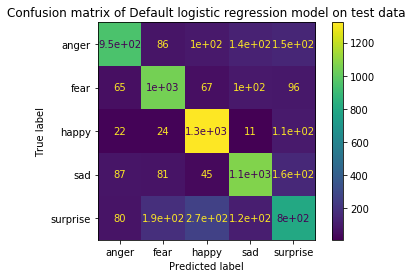

In [383]:
ConfusionMatrixDisplay(cf_matrix, display_labels=labels).plot(cmap='viridis')
plt.title('Confusion matrix of Default logistic regression model on test data')
plt.show()

__Time to automize this!__

In [384]:
#making a function that did everything above
def fit_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    labels = ['anger', 'fear', 'happy','sad','surprise']
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=labels).plot(cmap='vlag')
    plt.title(f'Confusion matrix of {model} model on test data')
    plt.show()
    print("\n")
    print("{} model has accuracy of {}".format(str(model),accuracy_score(y_test, y_pred)))
    return model

Now let us run this fit_predict function on the following models:
+ Multinomial Naive Bayes
+ Logistic Regression
+ K-Nearest-Neighbors
+ Support Vector Machines (SVM)
+ Decision Tree Classifier
+ Random Forest Classifier
+ XGB Classifier

Accuracy score: 0.7220833333333333
classification report

              precision    recall  f1-score   support

       anger       0.79      0.66      0.72      1430
        fear       0.74      0.76      0.75      1379
       happy       0.73      0.89      0.80      1485
         sad       0.74      0.74      0.74      1451
    surprise       0.61      0.55      0.58      1455

    accuracy                           0.72      7200
   macro avg       0.72      0.72      0.72      7200
weighted avg       0.72      0.72      0.72      7200





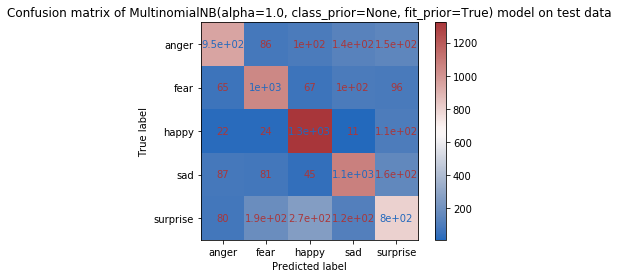



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) model has accuracy of 0.7220833333333333


In [385]:
model_MultinomalNB = fit_predict(MultinomialNB(),X_train_robust,y_train,X_test_robust,y_test)

Good model, seems like `surprise` is bringing down the accuracy

Accuracy score: 0.7675
classification report

              precision    recall  f1-score   support

       anger       0.78      0.74      0.76      1430
        fear       0.80      0.79      0.79      1379
       happy       0.81      0.86      0.83      1485
         sad       0.80      0.77      0.79      1451
    surprise       0.65      0.68      0.66      1455

    accuracy                           0.77      7200
   macro avg       0.77      0.77      0.77      7200
weighted avg       0.77      0.77      0.77      7200





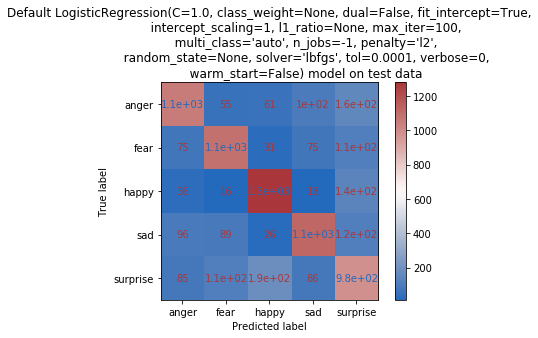



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) model has accuracy of 0.7675


In [184]:
model_LogisticRegression = fit_predict(LogisticRegression(n_jobs = -1),X_train_robust,y_train,X_test_robust,y_test)

Better model. Seems like `surprise` is bringing down the accuracy

Accuracy score: 0.48736111111111113
classification report

              precision    recall  f1-score   support

       anger       0.59      0.38      0.46      1430
        fear       0.68      0.33      0.45      1379
       happy       0.83      0.46      0.59      1485
         sad       0.76      0.44      0.56      1451
    surprise       0.30      0.81      0.44      1455

    accuracy                           0.49      7200
   macro avg       0.63      0.49      0.50      7200
weighted avg       0.63      0.49      0.50      7200





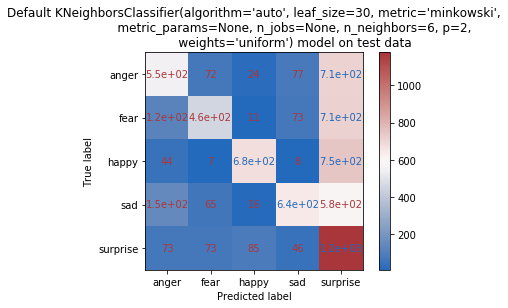



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform') model has accuracy of 0.48736111111111113


In [185]:
model_KNeighborsClassifier = fit_predict(KNeighborsClassifier(n_neighbors=6),X_train_robust,y_train,X_test_robust,y_test)

Not good. Again seems like `surprise` is bringing down the accuracy

Accuracy score: 0.7818055555555555
classification report

              precision    recall  f1-score   support

       anger       0.81      0.75      0.78      1430
        fear       0.85      0.80      0.82      1379
       happy       0.82      0.85      0.84      1485
         sad       0.83      0.78      0.80      1451
    surprise       0.63      0.73      0.68      1455

    accuracy                           0.78      7200
   macro avg       0.79      0.78      0.78      7200
weighted avg       0.79      0.78      0.78      7200





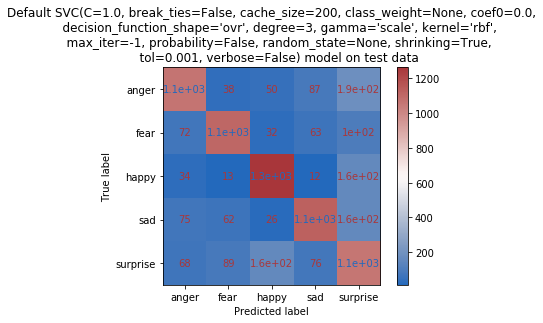



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) model has accuracy of 0.7818055555555555


In [186]:
model_SVC = fit_predict(SVC(),X_train_robust,y_train,X_test_robust,y_test)

Great model. Seems like `surprise` is bringing down the accuracy

Accuracy score: 0.73
classification report

              precision    recall  f1-score   support

       anger       0.76      0.71      0.73      1430
        fear       0.80      0.79      0.80      1379
       happy       0.72      0.79      0.76      1485
         sad       0.75      0.75      0.75      1451
    surprise       0.62      0.62      0.62      1455

    accuracy                           0.73      7200
   macro avg       0.73      0.73      0.73      7200
weighted avg       0.73      0.73      0.73      7200





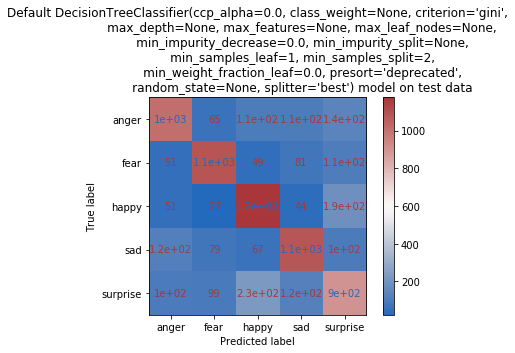



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') model has accuracy of 0.73


In [187]:
model_DecisionTreeClassifier = fit_predict(DecisionTreeClassifier(),X_train_robust,y_train,X_test_robust,y_test)

Great model once again, seems like `surprise` is bringing down the accuracy

Accuracy score: 0.7773611111111111
classification report

              precision    recall  f1-score   support

       anger       0.85      0.72      0.78      1430
        fear       0.86      0.80      0.83      1379
       happy       0.78      0.84      0.81      1485
         sad       0.80      0.80      0.80      1451
    surprise       0.63      0.72      0.67      1455

    accuracy                           0.78      7200
   macro avg       0.79      0.78      0.78      7200
weighted avg       0.78      0.78      0.78      7200





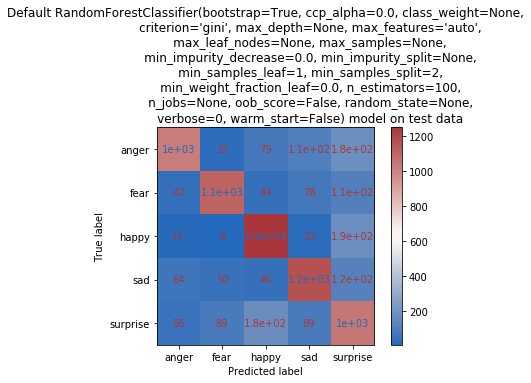



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) model has accuracy of 0.7773611111111111


In [188]:
model_RandomForestClassifier = fit_predict(RandomForestClassifier(),X_train_robust,y_train,X_test_robust,y_test)

Great model, seems like `surprise` is bringing down the accuracy

C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:15:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.7738888888888888
classification report

              precision    recall  f1-score   support

       anger       0.89      0.69      0.78      1430
        fear       0.89      0.77      0.83      1379
       happy       0.80      0.83      0.82      1485
         sad       0.80      0.79      0.80      1451
    surprise       0.59      0.78      0.67      1455

    accuracy                           0.77      7200
   macro avg       0.79      0.77      0.78      7200
weighted avg       0.79      0.77      0.78      7200





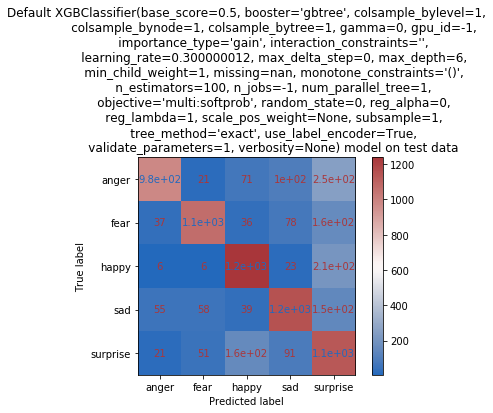



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None) model has accuracy of 0.7738888888888888


In [189]:
model_XGBClassifier = fit_predict(XGBClassifier(n_jobs=-1),X_train_robust,y_train,X_test_robust,y_test)

Seems like `surprise` is bringing down the accuracy

---

Based on the 7 models, `SVM` and `Random Forest Classifier` performed the best, followed by `XGB Classifier` and `Logistic Regression` which were just off by 1%. `KNN` performed the worst.

Also surprise emotion is getting more false negative and positives. Removing it can make the model better.

#### Prediction time

In [375]:
sample_txt = ['This is fun ']

In [376]:
sample_txt_transformed = tfidf.transform(sample_txt).toarray()
model_MultinomalNB.predict(sample_txt_transformed)

array(['happy'], dtype='<U8')

In [377]:
model_MultinomalNB.predict_proba(sample_txt_transformed)

array([[0.06939869, 0.05202675, 0.53839743, 0.1274056 , 0.21277153]])

In [378]:
from dict import dict

In [379]:
dict(zip(model_MultinomalNB.classes_, model_MultinomalNB.predict_proba(sample_txt_transformed)[0]))

{'anger': 0.06939868651220493,
 'fear': 0.052026752905218146,
 'happy': 0.5383974284353249,
 'sad': 0.12740560373454246,
 'surprise': 0.2127715284127098}

In [380]:
def predict_emotion(txt, model):
    sample_transformed = tfidf.transform(txt).toarray()
    prediction = model.predict(sample_transformed)
    prediction_probability = model.predict_proba(sample_transformed)
    print(f"Prediction: {prediction[0]}, Prediction Score: {np.max(prediction_probability)}")
    
    # gets a dictionary of {'class_name': probability}
    prob_per_class_dictionary = dict(zip(model.classes_, prediction_probability[0]))
    return prob_per_class_dictionary

In [387]:
predict_emotion(sample_txt,model_RandomForestClassifier)

Prediction: happy, Prediction Score: 0.94


{'anger': 0.0, 'fear': 0.0, 'happy': 0.94, 'sad': 0.02, 'surprise': 0.04}

---

__INSIGHTS__:

+ Examining confusion matrices, the Surprise emotion seemed to have higher false-negative and false positives in the models.
+ SVM took much longer to compute than any other classifier, while Random Forest Classifier, XGB Classifier, and Logistic Regression were much faster to train and have similar accuracy. 
+ The most frequent token/word in the cleaned corpus is ‘feel’ followed by ‘realli’, ‘thank’, ‘like’ and ‘good’.
+ The models have a hard time understanding sarcasm.
+ Models can be tricked to give wrong emotion (common words from an emotion class can sway the prediction)


__Next steps__: 
+ I have successfully made machine learning models that help predict 5 emotions. Ican improve my project by:
+ Training using deep learning models (CNN/RNN)
+ Looking at more emotions than 5. Possibly, every emotion from plutchik’s emotion wheel
+ Making a text generator using Neural networks that will rephrase the sentence
